In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from wordcloud import WordCloud
import ast
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MultiLabelBinarizer
import joblib

In [2]:
df = pd.read_csv("../dataset/User-data-10000.csv")

In [3]:
df.head()

,hard_skill,soft_skill,label,candidate_field
0,"['business', 'merchandising', 'sales', 'service']",['customer service'],0,retail & consumer products
1,"['application', 'business', 'business requirem...","['accountability', 'collaboration', 'innovatio...",0,sales
2,"['application', 'cancer', 'endocrinology', 'hy...","['research', 'training and development']",0,healthcare & medical
3,"['access controls', 'data', 'intrusion detecti...","['information technology', 'infrastructure', '...",1,telecomunication
4,"['analytics', 'blogs', 'business', 'content cr...","['management', 'microsoft office', 'planning',...",0,marketing


In [4]:
def convert_to_list(value):
    if isinstance(value, str):
        return ast.literal_eval(value)
    else:
        return value

In [5]:
df['hard_skill'] = df['hard_skill'].apply(convert_to_list)
df['soft_skill'] = df['soft_skill'].apply(convert_to_list)
df.head()

,hard_skill,soft_skill,label,candidate_field
0,"[business, merchandising, sales, service]",[customer service],0,retail & consumer products
1,"[application, business, business requirements,...","[accountability, collaboration, innovation, ma...",0,sales
2,"[application, cancer, endocrinology, hydrother...","[research, training and development]",0,healthcare & medical
3,"[access controls, data, intrusion detection sy...","[information technology, infrastructure, manag...",1,telecomunication
4,"[analytics, blogs, business, content creation,...","[management, microsoft office, planning, socia...",0,marketing


In [6]:
df['skill'] = df.apply(lambda row: row['hard_skill'] + row['soft_skill'], axis=1)
df.drop(columns=['hard_skill', 'soft_skill', 'label'], inplace=True)
df.head()

,candidate_field,skill
0,retail & consumer products,"[business, merchandising, sales, service, cust..."
1,sales,"[application, business, business requirements,..."
2,healthcare & medical,"[application, cancer, endocrinology, hydrother..."
3,telecomunication,"[access controls, data, intrusion detection sy..."
4,marketing,"[analytics, blogs, business, content creation,..."


In [7]:
df['candidate_field'].value_counts()

candidate_field
telecomunication                   2382
healthcare & medical               1831
administration & office support    1526
accounting                         1477
sales                              1242
retail & consumer products          674
marketing                           609
advertising, arts & media           140
sport & recreation                  119
Name: count, dtype: int64

In [8]:
def flatten_list(lst):
  return [item for sublist in lst for item in sublist]

all_strings = flatten_list(df['skill'].tolist())
pd.Series(all_strings).value_counts()

business                       5427
management                     5238
service                        3934
sales                          2647
application                    2130
                               ... 
document-oriented databases       1
permanent establishment           1
apple ios                         1
psychometrics                     1
escalation procedures             1
Name: count, Length: 4688, dtype: int64

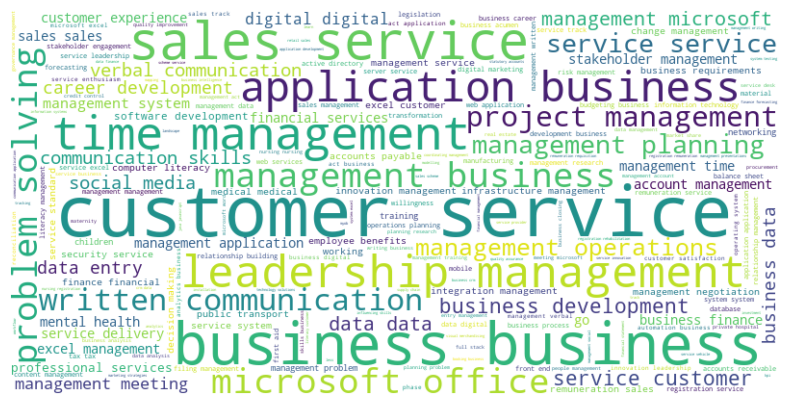

In [9]:
all_skills = ' '.join(item for sublist in df['skill'].tolist() for item in sublist)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_skills)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

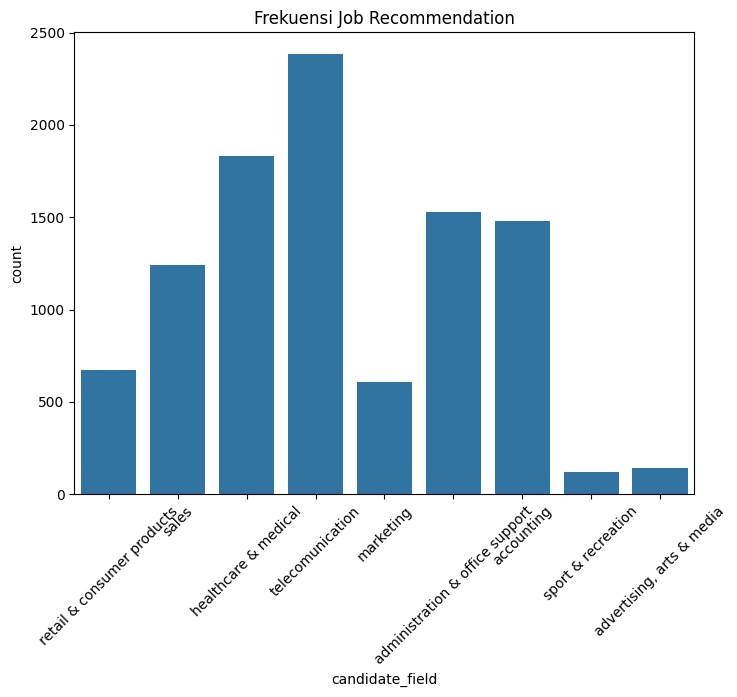

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='candidate_field', data=df)
plt.title('Frekuensi Job Recommendation')
plt.xticks(rotation=45)
plt.show()

In [11]:
mlb = MultiLabelBinarizer()

In [12]:
X = mlb.fit_transform(df['skill'])
y = df['candidate_field']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
knn = KNeighborsClassifier(metric='jaccard')

In [77]:
param_grid = {'n_neighbors': range(1, 11)}

grid_search = GridSearchCV(knn, param_grid, cv=5) 
grid_search.fit(X_train, y_train)

c:\Python312\Lib\site-packages\sklearn\metrics\pairwise.py:2317: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
c:\Python312\Lib\site-packages\sklearn\metrics\pairwise.py:2317: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
c:\Python312\Lib\site-packages\sklearn\metrics\pairwise.py:2317: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
c:\Python312\Lib\site-packages\sklearn\metrics\pairwise.py:2317: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
c:\Python312\Lib\site-packages\sklearn\metrics\pairwise.py:2317: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
c:\Python312\Lib\site-packages\sklearn\metrics\pairwise.py:2317: DataConversionWarning: Data wa

GridSearchCV(cv=5, estimator=KNeighborsClassifier(metric='jaccard'),
             param_grid={'n_neighbors': range(1, 11)})

In [17]:
grid_search.best_params_['n_neighbors']

NameError: name 'grid_search' is not defined

In [14]:
knn = KNeighborsClassifier(metric='jaccard', n_neighbors=10)

In [ ]:
y_pred = grid_search.best_estimator_.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

c:\Python312\Lib\site-packages\sklearn\metrics\pairwise.py:2317: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


Classification Report:
                                  precision    recall  f1-score   support

                     accounting       0.76      0.89      0.82       293
administration & office support       0.62      0.75      0.68       313
      advertising, arts & media       0.56      0.16      0.24        32
           healthcare & medical       0.85      0.84      0.85       328
                      marketing       0.72      0.52      0.61       115
     retail & consumer products       0.56      0.65      0.60       147
                          sales       0.72      0.70      0.71       290
             sport & recreation       0.86      0.55      0.67        22
               telecomunication       0.94      0.82      0.87       460

                       accuracy                           0.76      2000
                      macro avg       0.73      0.65      0.67      2000
                   weighted avg       0.77      0.76      0.76      2000



In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='jaccard', n_neighbors=10)

In [18]:
y_pred = knn.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

c:\Python312\Lib\site-packages\sklearn\metrics\pairwise.py:2317: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


Classification Report:
                                  precision    recall  f1-score   support

                     accounting       0.76      0.89      0.82       293
administration & office support       0.62      0.75      0.68       313
      advertising, arts & media       0.56      0.16      0.24        32
           healthcare & medical       0.85      0.84      0.85       328
                      marketing       0.72      0.52      0.61       115
     retail & consumer products       0.56      0.65      0.60       147
                          sales       0.72      0.70      0.71       290
             sport & recreation       0.86      0.55      0.67        22
               telecomunication       0.94      0.82      0.87       460

                       accuracy                           0.76      2000
                      macro avg       0.73      0.65      0.67      2000
                   weighted avg       0.77      0.76      0.76      2000



In [19]:
test = [
        "System",
        "Python",
        "Coding",
        "Cisco",
        "Postgresql",
        "Editing",
        "Modeling",
        "Javascript",
        "Docker",
        "Mobile",
        "Cryptography",
        "Mysql",
        "Vue.js",
        "Information system",
        "Api",
        "Css",
        "Html",
        "Networking",
        "Engineering",
        "Cloud",
        "Saas",
        "Linux",
        "Programming",
        "Sql",
        "Ai",
        "Github",
        "Database",
        "Lan",
        "Nosql",
        "Django"
    ]

In [21]:
test_skills_str = ' '.join(test)
test_vectorized = mlb.transform([test])

distances, indices = knn.kneighbors(test_vectorized, n_neighbors=10)


for i, index in enumerate(indices[0]):
    print(f"{i+1}. candidate: {y_train.iloc[index]} (dist: {distances[0][i]:.4f})")

c:\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:900: UserWarning: unknown class(es) ['Ai', 'Api', 'Cisco', 'Cloud', 'Coding', 'Cryptography', 'Css', 'Database', 'Django', 'Docker', 'Editing', 'Engineering', 'Github', 'Html', 'Information system', 'Javascript', 'Lan', 'Linux', 'Mobile', 'Modeling', 'Mysql', 'Networking', 'Nosql', 'Postgresql', 'Programming', 'Python', 'Saas', 'Sql', 'System', 'Vue.js'] will be ignored
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\metrics\pairwise.py:2317: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


1. candidate: healthcare & medical (dist: 1.0000)
2. candidate: telecomunication (dist: 1.0000)
3. candidate: telecomunication (dist: 1.0000)
4. candidate: healthcare & medical (dist: 1.0000)
5. candidate: administration & office support (dist: 1.0000)
6. candidate: healthcare & medical (dist: 1.0000)
7. candidate: accounting (dist: 1.0000)
8. candidate: healthcare & medical (dist: 1.0000)
9. candidate: telecomunication (dist: 1.0000)
10. candidate: retail & consumer products (dist: 1.0000)


In [22]:
unique_candidate_fields = set()

for index in indices[0]:
    unique_candidate_fields.add(y_train.iloc[index])

unique_candidate_fields_list = list(unique_candidate_fields)
unique_candidate_fields_list[:3]

['telecomunication', 'administration & office support', 'accounting']

In [36]:
joblib.dump(mlb, '../model/job_rec_mlb_encoder.pkl')
joblib.dump(y_train, '../model/job_rec_list.pkl')
joblib.dump(knn, '../model/job_rec_model.pkl')

['../model/job_rec_model.pkl']